In [1]:
import random
import numpy as np

'''
5-leg simulator
money:
$ per parlay
% ev:
'''

'\n5-leg simulator\nmoney:\n$ per parlay\n% ev:\n'

In [2]:
money = 1500 * 2
parlay = 5
ev = 5.5

bets = int(money/parlay)

simulations = 1000

print("The amount of bankroll is: " + str(money))
print("The number of bets placed is: " + str(bets))
print("The amount of money bet per parlay is: " + str(parlay))
print("The expected value is: " + str(ev))
print("The number of simulations is: " + str(simulations))


The amount of bankroll is: 3000
The number of bets placed is: 600
The amount of money bet per parlay is: 5
The expected value is: 5.5
The number of simulations is: 1000


In [3]:
profits = []

for i in range(simulations):

    profit = 0

    for i in range(bets):
        leg1 = random.randint(0,1000)
        leg2 = random.randint(0,1000)
        leg3 = random.randint(0,1000)
        leg4 = random.randint(0,1000)
        leg5 = random.randint(0,1000)

        legs = [leg1, leg2, leg3, leg4, leg5]
        kept_legs = [i for i in legs if i < ((50+ev) * 10)]

        if len(kept_legs) < 3:
            profit += -1 * parlay
        elif len(kept_legs) == 3:
            profit += (parlay * 0.4) - parlay
        elif len(kept_legs) == 4:
            profit += (parlay * 2) - parlay
        elif len(kept_legs) == 5:
            profit += (parlay * 10) - parlay
    
    profits.append(profit)
        

234.188
227.0


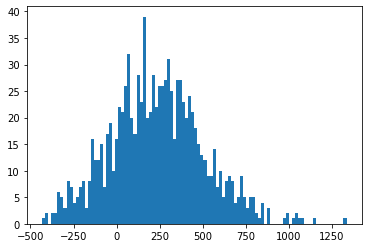

[ 217.41122585951484 ,  250.96477414048513 ]


In [4]:
print(np.mean(profits))
print(np.median(profits))

# show distribution of profits
import matplotlib.pyplot as plt
plt.hist(profits, bins=100)
plt.show()

# get 95% confidence interval
from scipy import stats
confidence = 0.95
data = profits
n = len(data)
m = np.mean(data)
std_err = stats.sem(data)
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
print("[", m-h, ", ", m+h, "]")


